In [32]:
import pandas as pd
import numpy as np

In [34]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import callbacks
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout # helps in overfitting by eliminating insignificant features

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae
import seaborn as sns
%matplotlib inline

# for interactive shells
from IPython.display import display

import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter('ignore')

In [36]:
df=pd.read_csv('concrete_data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [37]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [39]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [40]:
# understanding the kind of distributions
def dist_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs=plt.subplots(rows, cols, figsize=(16,16))
    fig.suptitle(suptitle, y=0.92, size=16)
    axs=axs.flatten()
    for i, data in enumerate(columns_list):
        sns.distplot(dataset[data], ax=axs[i])
        axs[i].set_title(data +', skewness is' + str(round(dataset[data].skew(axis=0, skipna= True),2)))

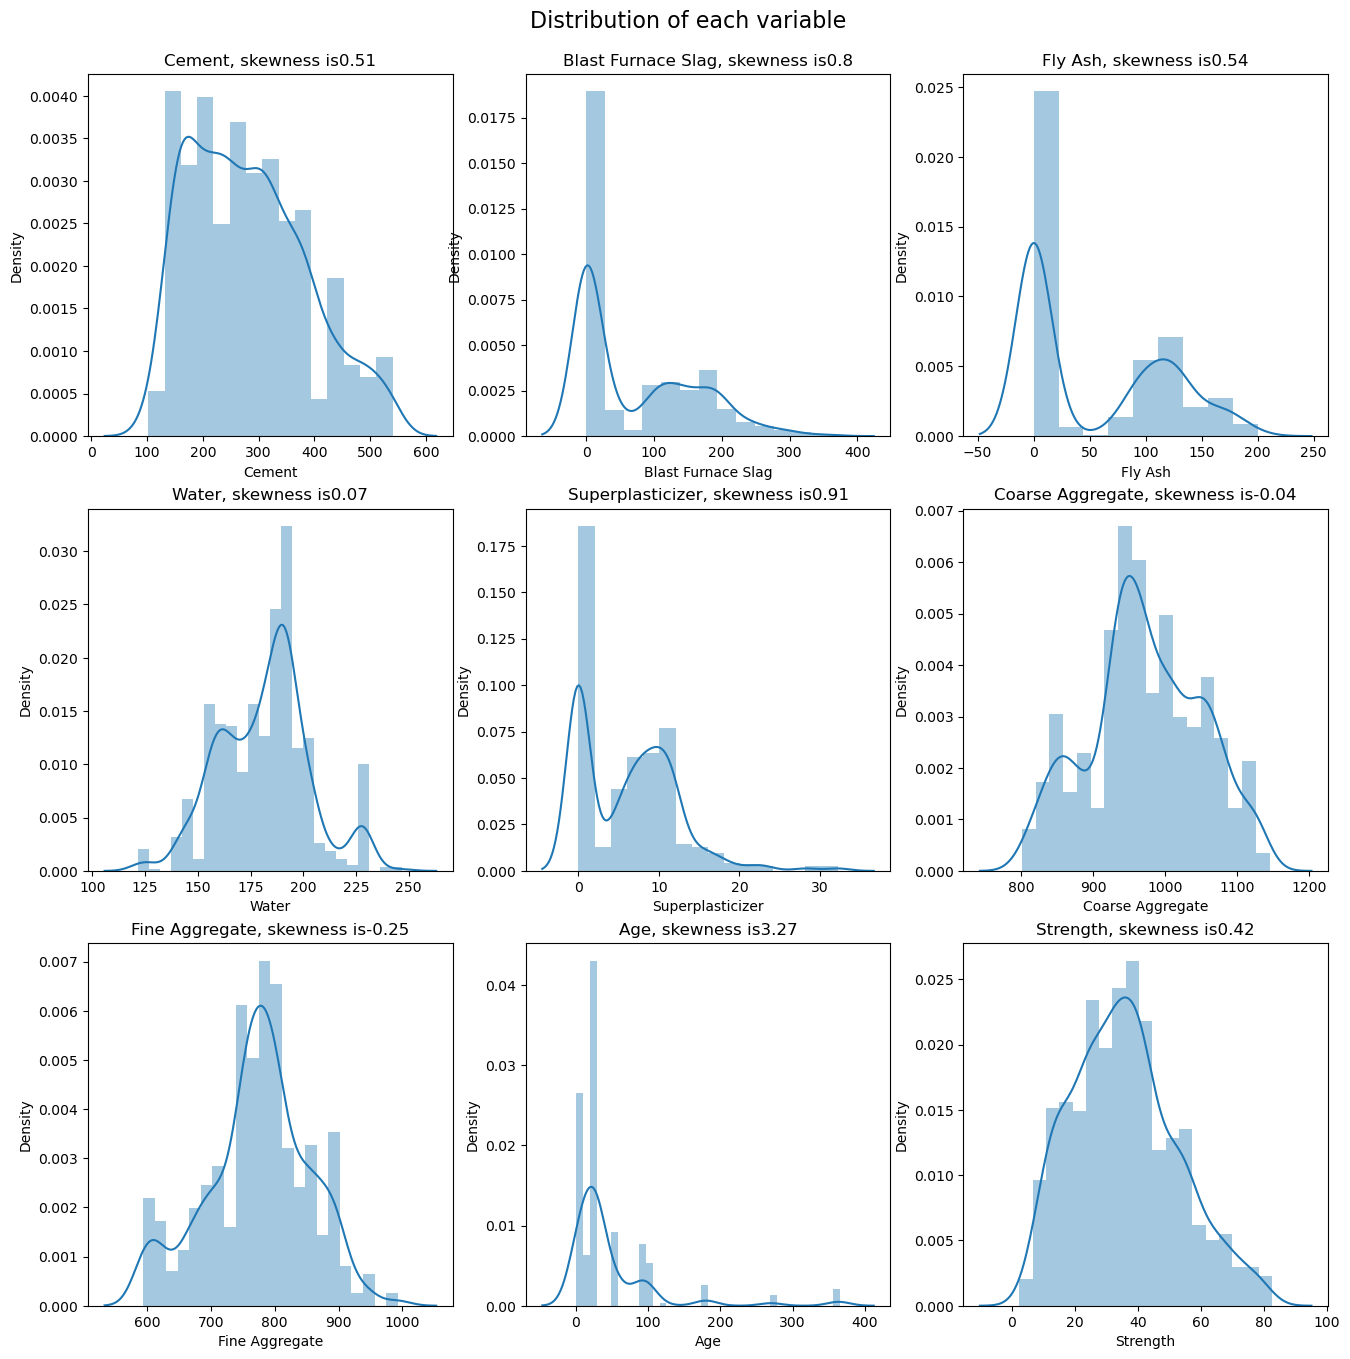

In [41]:
dist_custom(dataset=df, columns_list=df.columns, rows=3, cols=3, suptitle='Distribution of each variable')

In [42]:
# To view outliers
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols,sharey=True ,figsize=(16,12))     #Sharey is not mandatory
    fig.suptitle(suptitle,y=0.92, size=16)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        if i % 3 == 0:
            axs[i].set_ylabel('The number of entries')
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data)

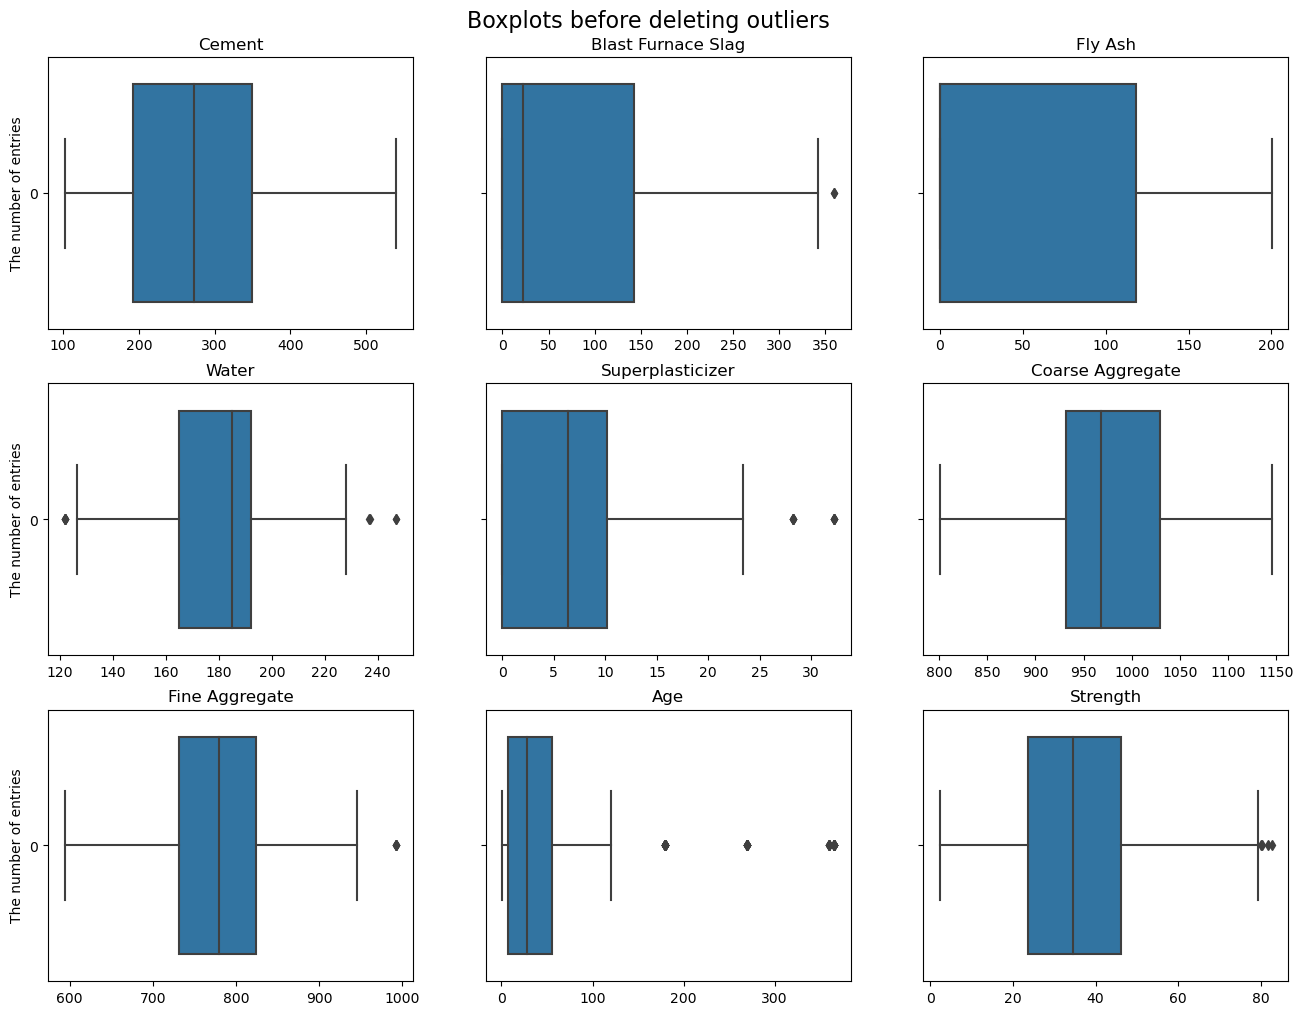

In [43]:
boxplots_custom(dataset=df, columns_list=df.columns, rows=3, cols=3, suptitle='Boxplots before deleting outliers')

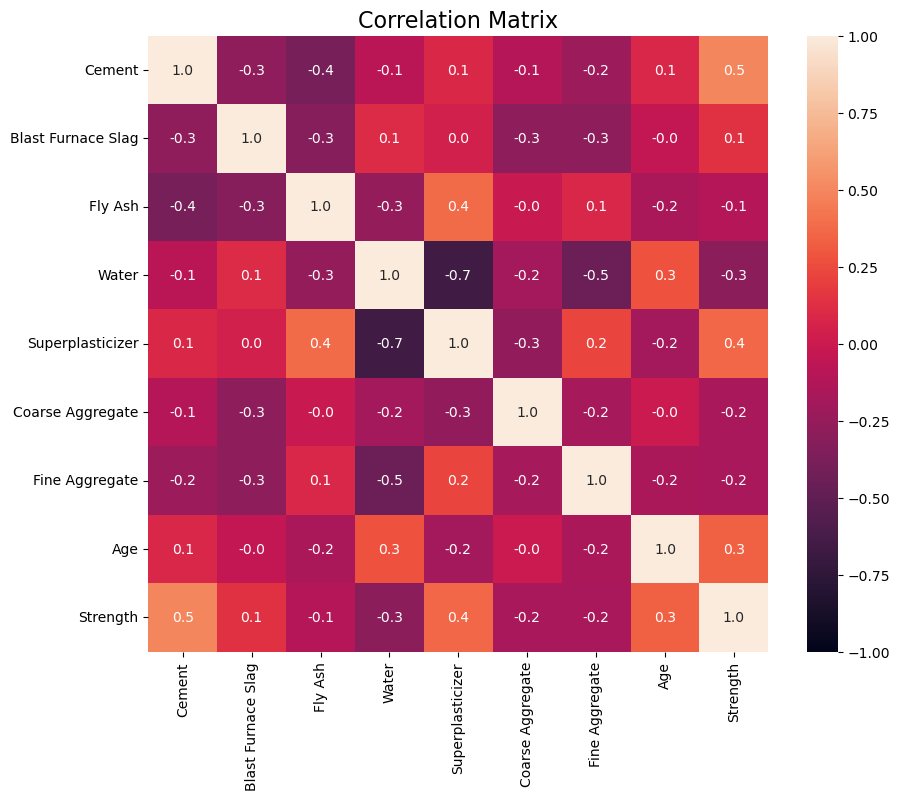

In [44]:
# correlation matrix
corr=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, vmax=1.0, vmin=-1.0,
           fmt='0.1f', annot=True)
plt.title('Correlation Matrix', size=16)
plt.show()

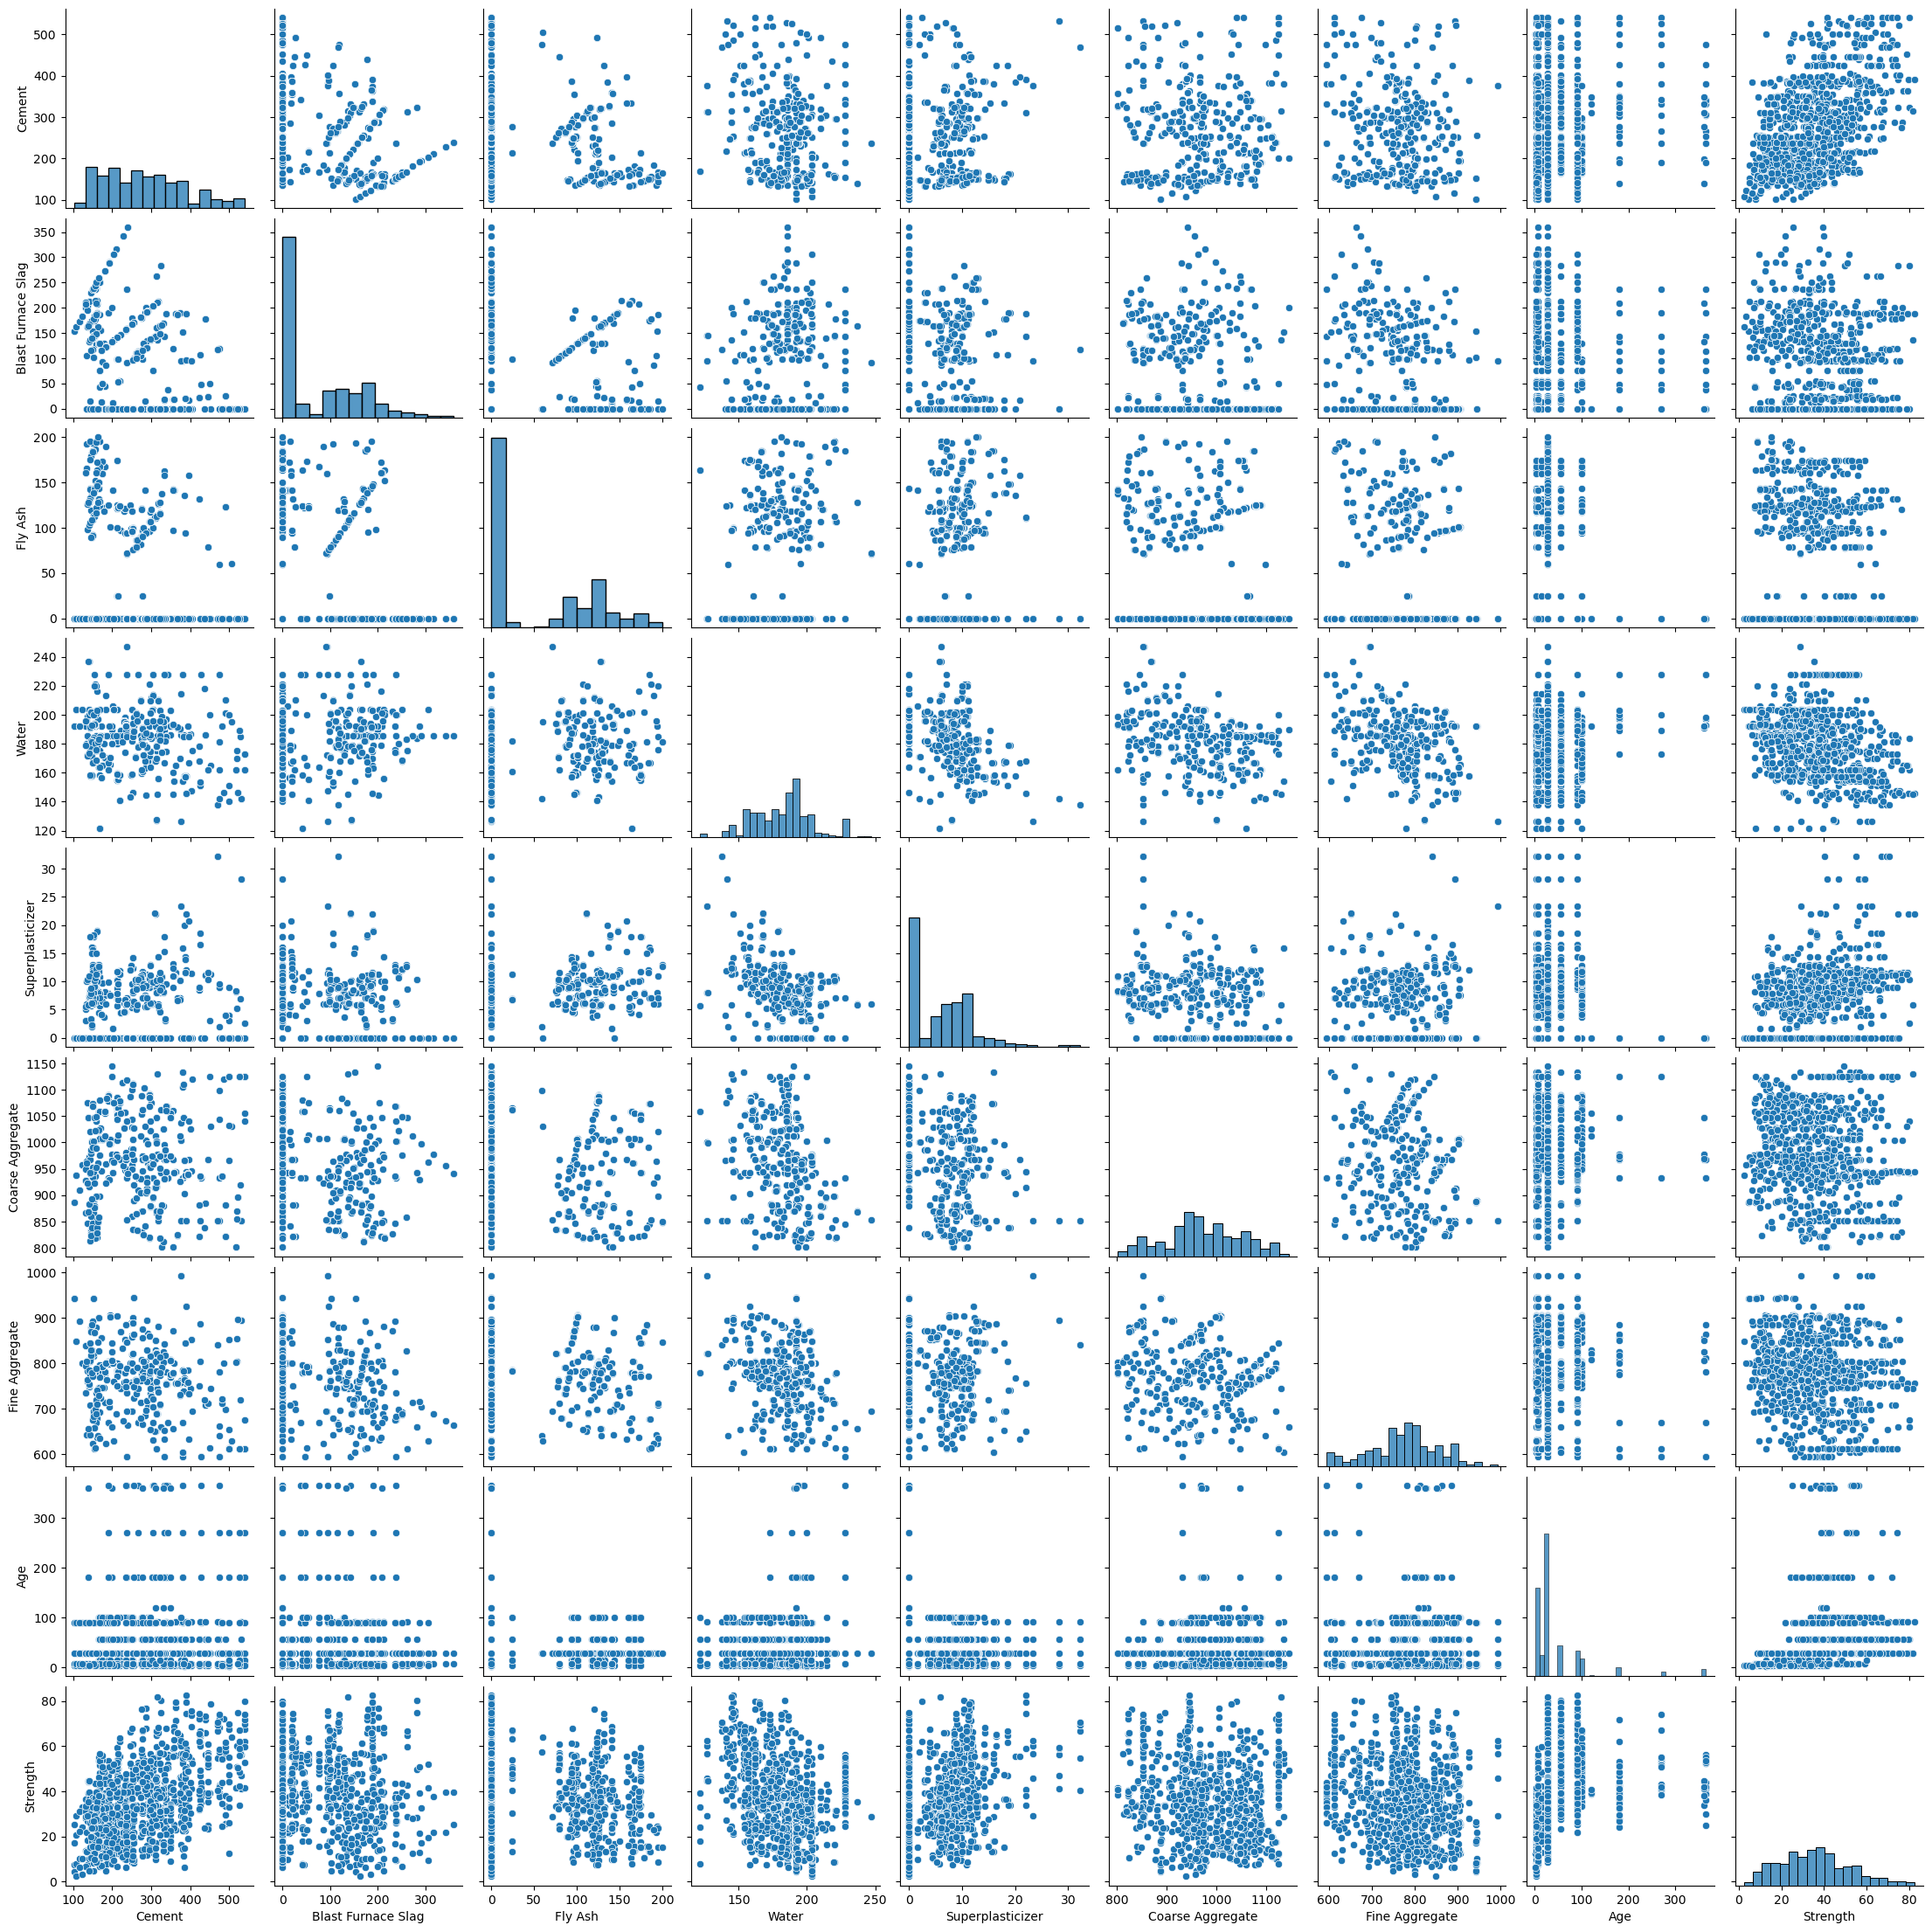

In [45]:
sns.pairplot(data=df)
plt.show()

In [46]:
#sns.pairplot(data=df, diag_kind='hist', kind='kde')
#plt.show()

# Data Preprocessing

In [47]:
X = df.iloc[:,0:-1].values #1st : indicates all rows, 2nd indicates all columns exc -1 (last/target var)
y = df.iloc[:,-1].values

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [49]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model Building using ANN

In [50]:
model1 = Sequential()

#Adding the input layer and the first hidden layer
model1.add(Dense(units=100,
                kernel_initializer = 'uniform',
                activation = 'relu',
                input_shape = [X_train.shape[1]]))    ## [x_train.shape[1] = returns columns, 0 returns no.of rows

#Adding the second hidden layer
model1.add(Dense(units = 60, kernel_initializer = 'uniform', activation = 'relu'))

#Adding the third hidden layer
model1.add(Dense(units = 80, kernel_initializer = 'uniform', activation = 'relu'))

#Adding the fourth hidden layer
model1.add(Dense(units = 90, kernel_initializer = 'uniform', activation = 'relu'))

#Adding the fifth hidden layer
model1.add(Dense(units = 100, kernel_initializer = 'uniform', activation = 'relu'))

#Adding the output layer
model1.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [51]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 100)            │           900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 60)             │         6,060 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 80)             │         4,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 90)             │         7,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │         9,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,331 (110.67 KB)

 Trainable params: 28,331 (110.67 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
# Compiling the ANN
model1.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the ANN to the training set

history = model1.fit(X_train, y_train,
                     batch_size=62,
                     epochs=100,
                     validation_split=0.1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1489.9467 - val_loss: 1560.9073
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1488.9434 - val_loss: 1548.9424
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1486.1735 - val_loss: 1526.8021
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1362.0878 - val_loss: 1526.5797
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1388.6252 - val_loss: 1526.5793
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1432.4996 - val_loss: 1526.5793
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1470.3403 - val_loss: 1526.5793
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1435.9451 - val_loss: 1526.5793
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1451.6479 - val_loss: 1526.5793
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1457.3961 - val_loss: 1526.5793
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1415.6389 - val_loss: 1526.57

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1416.2502 - val_loss: 1526.5793
Epoch 67/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1411.8328 - val_loss: 1526.5793
Epoch 68/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1452.5326 - val_loss: 1526.5793
Epoch 69/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1461.9585 - val_loss: 1526.5793
Epoch 70/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1425.0551 - val_loss: 1526.5793
Epoch 71/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1442.9039 - val_loss: 1526.5793
Epoch 72/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1419.9418 - val_loss: 1526.5793
Epoch 73/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1465.3413 - val_loss: 1526.5793
Epoch 74/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1423.4073 - val_loss: 1526.5793
Epoch 75/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1389.0912 - val_loss: 1526.5793
Epoch 76/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1402.7975 - val_loss: 1526.5793
E

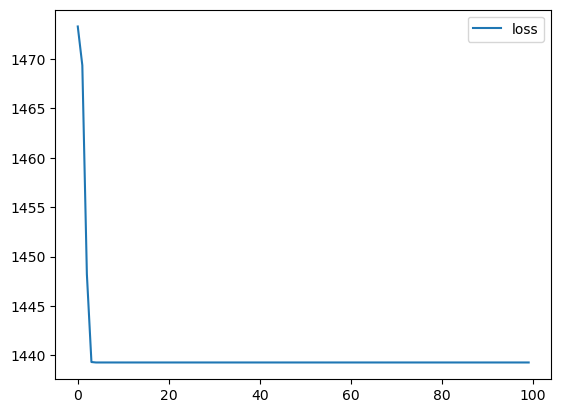

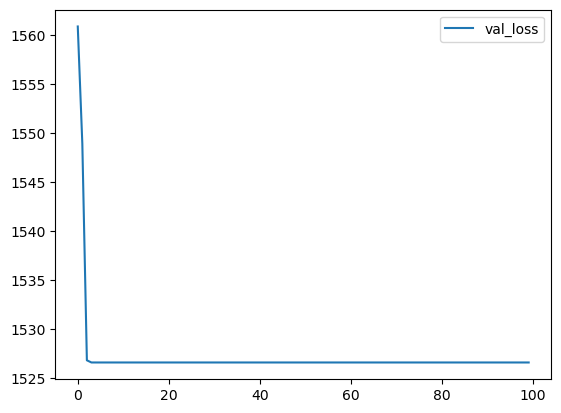

In [53]:
history = pd.DataFrame(history.history)
history.loc[:,['loss']].plot();  # this plot is wrong for some reason
history.loc[:,['val_loss']].plot();

In [54]:
y_pred = model1.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [55]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-4.95810879991747

In [56]:
# horrible r2 and hence model

In [57]:
#plt.style.available

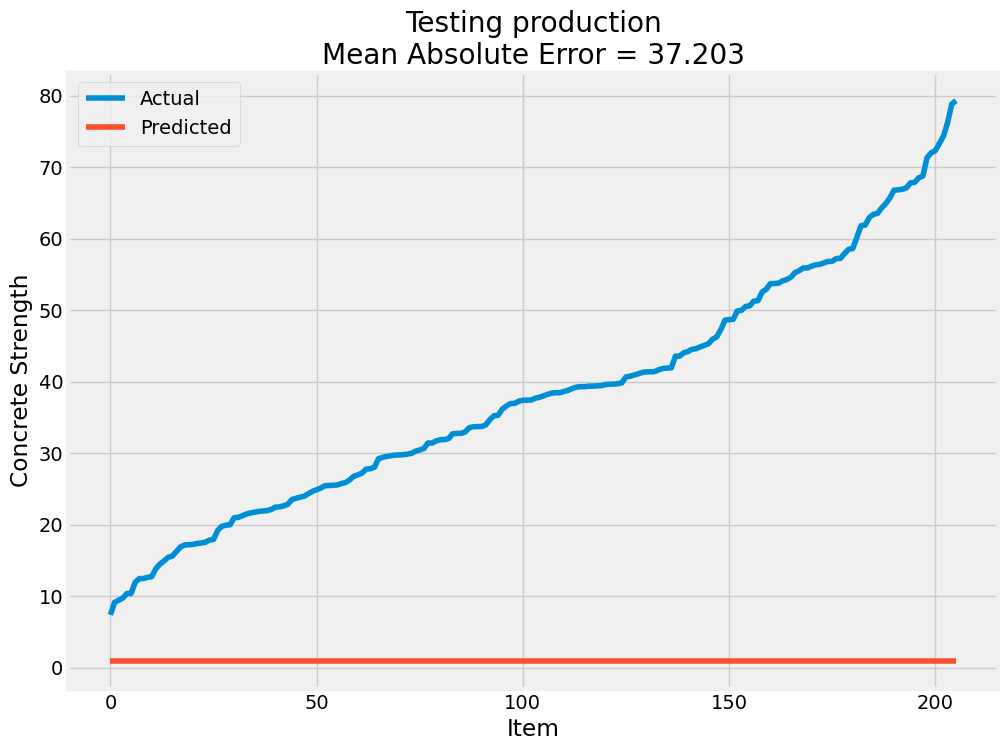

In [58]:
MAE = mae(y_test, y_pred)

plt.figure(figsize=(12,8))
with plt.style.context('fivethirtyeight'):
    
    plt.plot(sorted(y_test), label='Actual')
    plt.plot(sorted(y_pred), label='Predicted')
    
    plt.title('Testing production\nMean Absolute Error = {:.3f}'.format(MAE))
    plt.ylabel('Concrete Strength')
    plt.xlabel('Item')
    plt.legend()
plt.show()

# Improving with different architecture

In [60]:
model2 = keras.Sequential([
    Dense(40, activation = 'relu', input_shape = [X_train.shape[1]]),
    Dense(50, activation = 'relu'),
    Dense(60, activation = 'relu'),
    Dense(1, activation = 'linear'),
])

In [61]:
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 40)             │           360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 50)             │         2,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 60)             │         3,060 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            61 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,531 (21.61 KB)

 Trainable params: 5,531 (21.61 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
model2.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [65]:
history_df = model2.fit(X_train, y_train,
                     batch_size=62,
                     epochs=100,
                     validation_split=0.1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 22.7582 - val_loss: 31.2559
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23.0919 - val_loss: 30.3686
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21.2223 - val_loss: 31.6991
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22.1650 - val_loss: 32.2277
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 18.1034 - val_loss: 31.4113
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20.9763 - val_loss: 31.9070
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20.9577 - val_loss: 30.4757
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19.7919 - val_loss: 30.8411
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19.3399 - val_loss: 31.0724
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20.5298 - val_loss: 29.9872
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 17.9930 - val_loss: 29.9309
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0

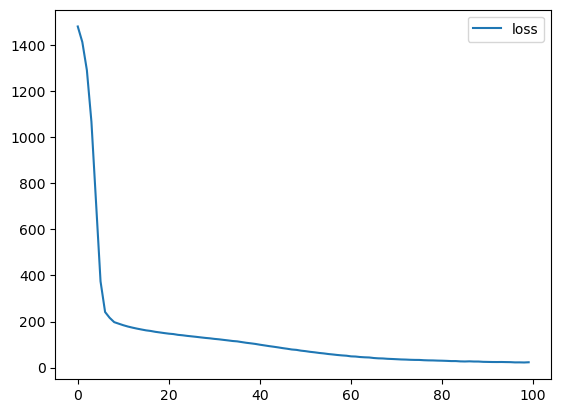

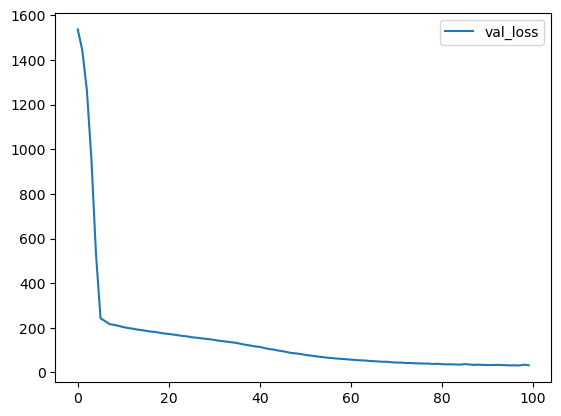

In [66]:
history_df = pd.DataFrame(history.history)
history_df.loc[:,['loss']].plot();  # this plot is wrong for some reason
history_df.loc[:,['val_loss']].plot();

In [67]:
y_pred = model2.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [68]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8316067731851384

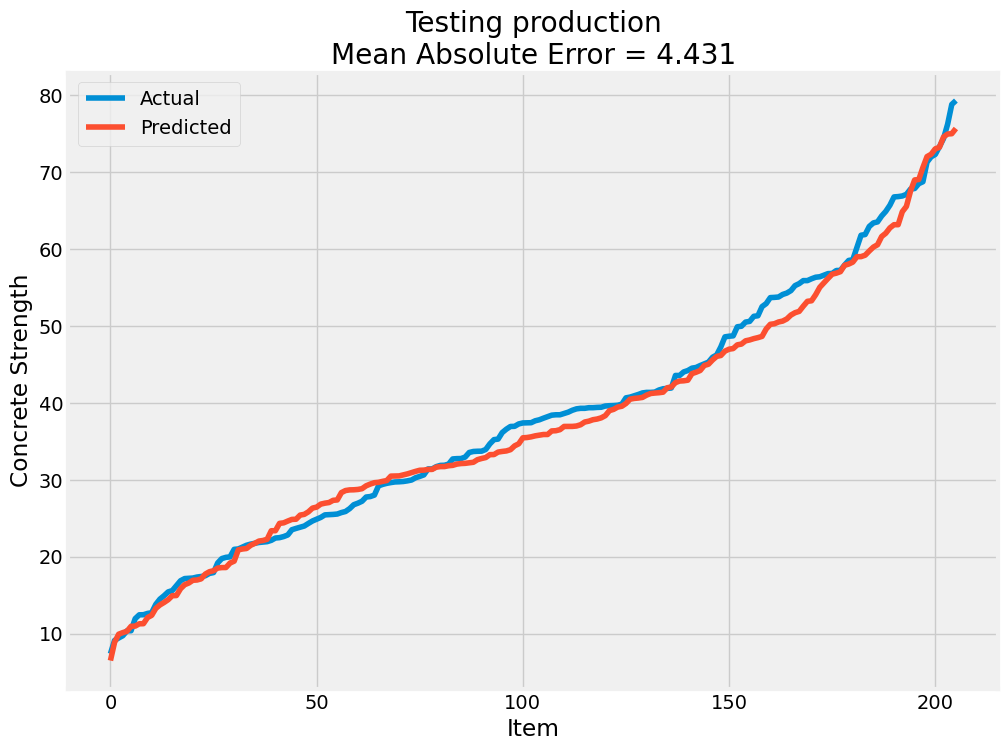

In [69]:
MAE = mae(y_test, y_pred)

plt.figure(figsize=(12,8))
with plt.style.context('fivethirtyeight'):
    
    plt.plot(sorted(y_test), label='Actual')
    plt.plot(sorted(y_pred), label='Predicted')
    
    plt.title('Testing production\nMean Absolute Error = {:.3f}'.format(MAE))
    plt.ylabel('Concrete Strength')
    plt.xlabel('Item')
    plt.legend()
plt.show()

# Improving ANN with Dropout layer

In [126]:
model3 = keras.Sequential([
    Dense(30, activation = 'relu', input_shape = [X_train.shape[1]]),
    Dense(40, activation = 'relu'),
    Dropout(rate = 0.1),
    Dense(50, activation = 'relu'),
    Dense(1, activation = 'linear'),
])

In [127]:
model3.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_44 (Dense)                │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 40)             │         1,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 40)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 50)             │         2,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,611 (14.11 KB)

 Trainable params: 3,611 (14.11 KB)

 Non-trainable params: 0 (0.00 B)

In [128]:
model3.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [129]:
history_do = model3.fit(X_train, y_train,
                     batch_size=62,
                     epochs=100,
                     validation_split=0.1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1537.1226 - val_loss: 1532.0585
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1468.5728 - val_loss: 1444.5841
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1389.1488 - val_loss: 1305.4596
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1143.1399 - val_loss: 1085.6490
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 932.5020 - val_loss: 777.0054
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 603.8225 - val_loss: 464.1336
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 364.7012 - val_loss: 311.8248
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 274.3318 - val_loss: 279.8710
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 227.9811 - val_loss: 248.3674
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 222.9401 - val_loss: 233.3938
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 199.0437 - val_loss: 227.2103
Epoch 12/10

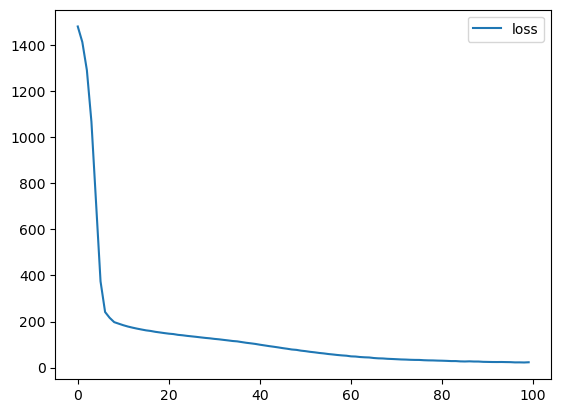

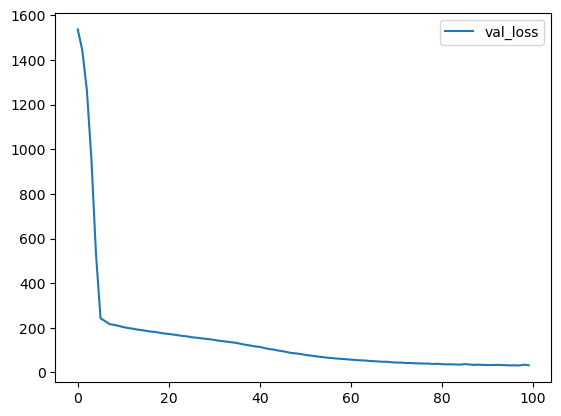

In [130]:
history_do = pd.DataFrame(history.history)
history_do.loc[:,['loss']].plot();  # this plot is wrong for some reason
history_do.loc[:,['val_loss']].plot();

In [131]:
y_pred = model3.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [132]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.813540761165203

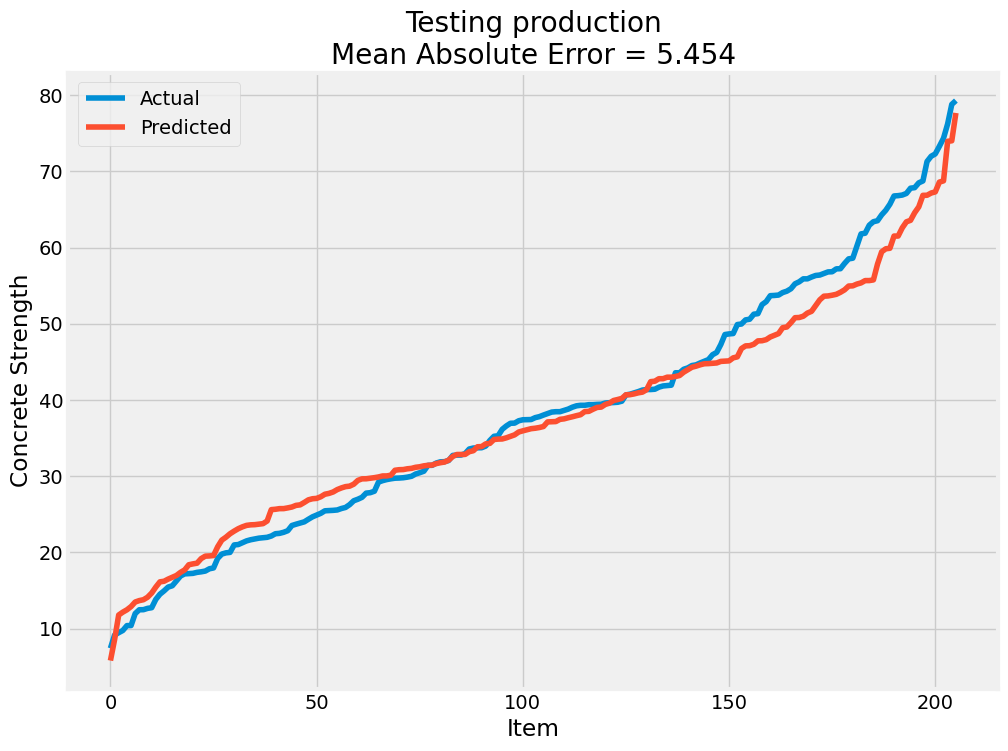

In [133]:
MAE = mae(y_test, y_pred)

plt.figure(figsize=(12,8))
with plt.style.context('fivethirtyeight'):
    
    plt.plot(sorted(y_test), label='Actual')
    plt.plot(sorted(y_pred), label='Predicted')
    
    plt.title('Testing production\nMean Absolute Error = {:.3f}'.format(MAE))
    plt.ylabel('Concrete Strength')
    plt.xlabel('Item')
    plt.legend()
plt.show()